### Bechdel Analysis Feature Selection
Determining which features have a strong correlation with movies' Bechdel Test result.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
data = pd.read_csv("bechdel_analysis_data_cleaned.csv", float_precision=None)
data

,year,imdb,title,clean_test,binary,budget_2013$,domgross_2013$,intgross_2013$,adult,genres,prod_comps,overview,tagline,perc_women_producers,perc_women_directors
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,13000000,25682380.0,42195766.0,False,Comedy,"Mandeville Films,Relativity Media,SkyLand Ente...",Brilliant student Jeff Chang has the most impo...,Finally.,0.00,0.0
1,2012,tt1343727,Dredd 3D,ok,PASS,45658735,13611086.0,41467257.0,False,"Action,Science Fiction","Rena Film,DNA Films,Reliance Big Entertainment...","In the future, America is a dystopian wastelan...",Judgement is coming,0.00,0.0
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,20000000,53107035.0,158607035.0,False,"Drama,History","New Regency Pictures,Plan B Entertainment,Rive...","In the pre-Civil War United States, Solomon No...",The extraordinary true story of Solomon Northup,0.25,0.0
3,2013,tt1272878,2 Guns,notalk,FAIL,61000000,75612460.0,132493015.0,False,"Action,Comedy,Crime","Universal Pictures,Marc Platt Productions,EFO ...",A DEA agent and an undercover Naval Intelligen...,"2 Guns, 1 Bank.",0.00,0.0
4,2013,tt0453562,42,men,FAIL,40000000,95020213.0,95020213.0,False,Drama,"Warner Bros. Pictures,Legendary Pictures","The powerful story of Jackie Robinson, the leg...",The True Story of an American Legend,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,1971,tt0067741,Shaft,notalk,FAIL,305063707,404702718.0,616827003.0,False,"Action,Crime,Thriller","Shaft Productions,Metro-Goldwyn-Mayer",Cool black private eye John Shaft is hired by ...,The mob wanted Harlem back. They got shaft...u...,0.00,0.0
1731,1971,tt0067800,Straw Dogs,notalk,FAIL,143862856,59412143.0,64760273.0,False,"Crime,Drama,Thriller",ABC Pictures,"David Sumner, a mild-mannered academic from th...",Sometimes a man is forced to defend his honor.,0.00,0.0
1732,1971,tt0067116,The French Connection,notalk,FAIL,12659931,236848653.0,236848653.0,False,"Action,Crime,Thriller","D'Antoni Productions,Schine-Moore Productions,...",Tough narcotics detective 'Popeye' Doyle is in...,There are no rules and no holds barred when Po...,0.00,0.0
1733,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,men,FAIL,17263543,23018057.0,23018057.0,False,"Family,Fantasy,Comedy",David L. Wolper Productions,When eccentric candy man Willy Wonka promises ...,It's Scrumdidilyumptious!,0.00,0.0


In [3]:
data.corr()

,year,budget_2013$,domgross_2013$,intgross_2013$,adult,perc_women_producers,perc_women_directors
year,1.000000,0.084186,-0.285401,-0.132710,NaN,0.071720,0.047233
budget_2013$,0.084186,1.000000,0.457095,0.590704,NaN,0.033024,-0.119818
domgross_2013$,-0.285401,0.457095,1.000000,0.927337,NaN,-0.013501,-0.106036
intgross_2013$,-0.132710,0.590704,0.927337,1.000000,NaN,0.005254,-0.095272
adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perc_women_producers,0.071720,0.033024,-0.013501,0.005254,NaN,1.000000,0.177333
perc_women_directors,0.047233,-0.119818,-0.106036,-0.095272,NaN,0.177333,1.000000


In [4]:
data.cov()

,year,budget_2013$,domgross_2013$,intgross_2013$,adult,perc_women_producers,perc_women_directors
year,8.110880e+01,4.183662e+07,-3.260947e+08,-3.416696e+08,0.0,0.175573,1.075896e-01
budget_2013$,4.183662e+07,3.044822e+15,3.199934e+15,9.317963e+15,0.0,495331.236469,-1.672236e+06
domgross_2013$,-3.260947e+08,3.199934e+15,1.609562e+16,3.363267e+16,0.0,-465595.391599,-3.402531e+06
intgross_2013$,-3.416696e+08,9.317963e+15,3.363267e+16,8.172209e+16,0.0,408239.114310,-6.888571e+06
adult,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000e+00
perc_women_producers,1.755733e-01,4.953312e+05,-4.655954e+05,4.082391e+05,0.0,0.073887,1.219171e-02
perc_women_directors,1.075896e-01,-1.672236e+06,-3.402531e+06,-6.888571e+06,0.0,0.012192,6.397141e-02


Convert the pass/fail string binary column to 1=pass and 0=fail.

In [5]:
pass_fail_data = pd.get_dummies(data.binary, prefix='binary')
pass_fail_data = pass_fail_data.drop("binary_FAIL", axis=1)
data.drop(columns=['binary'])
data.insert(5, "binary_PASS", pass_fail_data["binary_PASS"])
data_new = data
data_new

,year,imdb,title,clean_test,binary,binary_PASS,budget_2013$,domgross_2013$,intgross_2013$,adult,genres,prod_comps,overview,tagline,perc_women_producers,perc_women_directors
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,0,13000000,25682380.0,42195766.0,False,Comedy,"Mandeville Films,Relativity Media,SkyLand Ente...",Brilliant student Jeff Chang has the most impo...,Finally.,0.00,0.0
1,2012,tt1343727,Dredd 3D,ok,PASS,1,45658735,13611086.0,41467257.0,False,"Action,Science Fiction","Rena Film,DNA Films,Reliance Big Entertainment...","In the future, America is a dystopian wastelan...",Judgement is coming,0.00,0.0
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,0,20000000,53107035.0,158607035.0,False,"Drama,History","New Regency Pictures,Plan B Entertainment,Rive...","In the pre-Civil War United States, Solomon No...",The extraordinary true story of Solomon Northup,0.25,0.0
3,2013,tt1272878,2 Guns,notalk,FAIL,0,61000000,75612460.0,132493015.0,False,"Action,Comedy,Crime","Universal Pictures,Marc Platt Productions,EFO ...",A DEA agent and an undercover Naval Intelligen...,"2 Guns, 1 Bank.",0.00,0.0
4,2013,tt0453562,42,men,FAIL,0,40000000,95020213.0,95020213.0,False,Drama,"Warner Bros. Pictures,Legendary Pictures","The powerful story of Jackie Robinson, the leg...",The True Story of an American Legend,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,1971,tt0067741,Shaft,notalk,FAIL,0,305063707,404702718.0,616827003.0,False,"Action,Crime,Thriller","Shaft Productions,Metro-Goldwyn-Mayer",Cool black private eye John Shaft is hired by ...,The mob wanted Harlem back. They got shaft...u...,0.00,0.0
1731,1971,tt0067800,Straw Dogs,notalk,FAIL,0,143862856,59412143.0,64760273.0,False,"Crime,Drama,Thriller",ABC Pictures,"David Sumner, a mild-mannered academic from th...",Sometimes a man is forced to defend his honor.,0.00,0.0
1732,1971,tt0067116,The French Connection,notalk,FAIL,0,12659931,236848653.0,236848653.0,False,"Action,Crime,Thriller","D'Antoni Productions,Schine-Moore Productions,...",Tough narcotics detective 'Popeye' Doyle is in...,There are no rules and no holds barred when Po...,0.00,0.0
1733,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,men,FAIL,0,17263543,23018057.0,23018057.0,False,"Family,Fantasy,Comedy",David L. Wolper Productions,When eccentric candy man Willy Wonka promises ...,It's Scrumdidilyumptious!,0.00,0.0


In [6]:
data_new.corr()

,year,binary_PASS,budget_2013$,domgross_2013$,intgross_2013$,adult,perc_women_producers,perc_women_directors
year,1.000000,0.084822,0.084186,-0.285401,-0.132710,NaN,0.071720,0.047233
binary_PASS,0.084822,1.000000,-0.147859,-0.108574,-0.093737,NaN,0.090313,0.203049
budget_2013$,0.084186,-0.147859,1.000000,0.457095,0.590704,NaN,0.033024,-0.119818
domgross_2013$,-0.285401,-0.108574,0.457095,1.000000,0.927337,NaN,-0.013501,-0.106036
intgross_2013$,-0.132710,-0.093737,0.590704,0.927337,1.000000,NaN,0.005254,-0.095272
adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perc_women_producers,0.071720,0.090313,0.033024,-0.013501,0.005254,NaN,1.000000,0.177333
perc_women_directors,0.047233,0.203049,-0.119818,-0.106036,-0.095272,NaN,0.177333,1.000000


Observations:
- Low positive correlation between year and passing
- Low negative correlation between all monetary categories
- Percentage of women directors had the largest correlation (positive)

### Domestic Gross Analysis

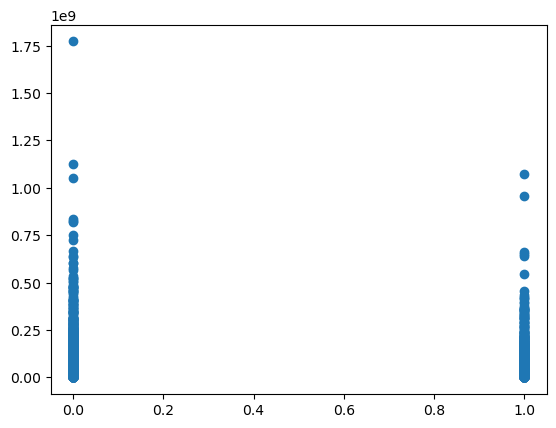

In [7]:
plt.scatter(data_new["binary_PASS"], data_new["domgross_2013$"])

In [8]:
data_fail = data_new.loc[data_new["binary_PASS"] == 0] 
data_pass = data_new.loc[data_new["binary_PASS"] == 1] 

Text(0, 0.5, '2013 Average Domestic Gross ($100 million)')

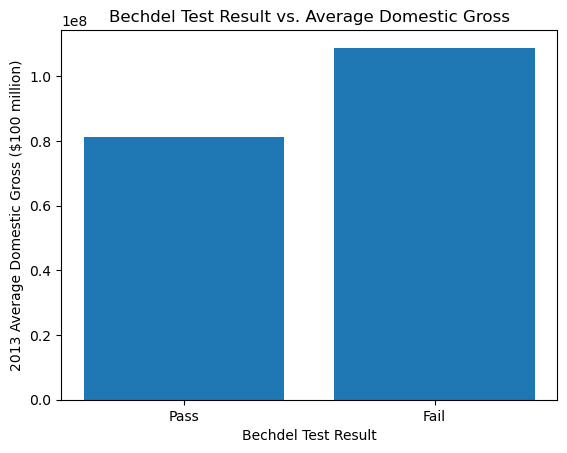

In [9]:
plt.bar(["Pass", "Fail"], [data_pass["domgross_2013$"].mean(), data_fail["domgross_2013$"].mean()])
plt.title("Bechdel Test Result vs. Average Domestic Gross")
plt.xlabel("Bechdel Test Result")
plt.ylabel("2013 Average Domestic Gross ($100 million)")

- There is a clear correlation between 2013 average domestic gross and Bechdel Test result


### Genre Analysis

In [10]:
data_new["genres"] = data_new["genres"].str.split(',')

In [11]:
mlb = MultiLabelBinarizer()
genre_data = pd.DataFrame(mlb.fit_transform(data_new["genres"]),
                          columns=mlb.classes_,
                          index=data_new.index)
genre_data

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1731,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1732,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1733,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [12]:
genre_data.to_csv("genre_data.csv")

In [13]:
genre_data.sum()

Action             490
Adventure          383
Animation          116
Comedy             642
Crime              266
Documentary          4
Drama              769
Family             198
Fantasy            232
History             70
Horror             194
Music               51
Mystery            152
Romance            319
Science Fiction    290
Thriller           461
War                 51
Western             25
dtype: int64

In [14]:
pass_fail_genre = pd.concat([pass_fail_data, genre_data], axis=1)

In [15]:
pass_fail_genre_corr = pass_fail_genre.corr()
pass_fail_genre_corr[["binary_PASS"]]

,binary_PASS
binary_PASS,1.000000
Action,-0.212506
Adventure,-0.131398
Animation,-0.048680
Comedy,0.067465
Crime,-0.109643
Documentary,-0.018751
Drama,0.069392
Family,0.022354
Fantasy,0.000128


In [16]:
pass_fail_genre_corr = pass_fail_genre.cov()
pass_fail_genre_corr[["binary_PASS"]]

,binary_PASS
binary_PASS,0.246984
Action,-0.047557
Adventure,-0.027092
Animation,-0.006045
Comedy,0.016193
Crime,-0.019638
Documentary,-0.000447
Drama,0.017137
Family,0.003533
Fantasy,0.000022


- Genres with a clear positive correlation above 0.1 include romance and horror
- Genres with a clear negative correlation above 0.1 include action, adventure, and crime.

### Year Analysis

Text(0.5, 0, 'Year')

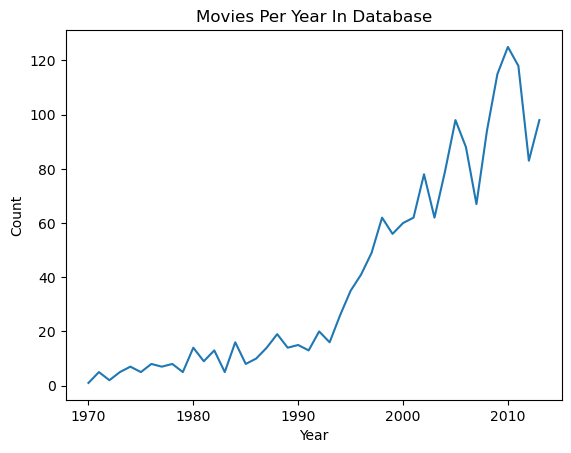

In [17]:
year_data = data_new[['binary_PASS','year']].groupby('year').count()
plt.plot(year_data.index,year_data['binary_PASS'])
plt.title("Movies Per Year In Database")
plt.ylabel("Count")
plt.xlabel("Year")

In [18]:
year_pass_data = data_new[data_new["binary_PASS"] == 1]
year_pass_data = year_pass_data[['binary_PASS','year']].groupby('year').count()
pass_percentage_data = year_pass_data / year_data
pass_percentage_data = pass_percentage_data.fillna(0)
pass_percentage_data

,binary_PASS
year,
1970,1.000000
1971,0.000000
1972,0.500000
1973,0.200000
1974,0.285714
1975,0.000000
1976,0.375000
1977,0.285714
1978,0.250000


Text(0.5, 0, 'Year')

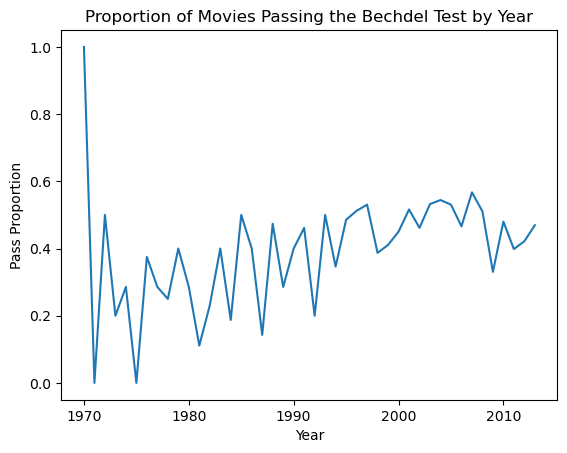

In [19]:
plt.plot(pass_percentage_data.index,pass_percentage_data['binary_PASS'])
plt.title("Proportion of Movies Passing the Bechdel Test by Year")
plt.ylabel("Pass Proportion")
plt.xlabel("Year")

- Pass rate fluctuated greatly by year in early years, likely because of the smaller sample size
- More recent rates stabilize
- Average pass rate slowly increases over time

### Adult Movie Analysis

In [20]:
adult_data = pd.get_dummies(data.adult, prefix='adult')
adult_data

,adult_False
0,1
1,1
2,1
3,1
4,1
...,...
1730,1
1731,1
1732,1
1733,1


No adult movies in the dataset :(

### Production Company Analysis

In [21]:
data_new["prod_comps"] = data_new["prod_comps"].str.split(',')
data_new

,year,imdb,title,clean_test,binary,binary_PASS,budget_2013$,domgross_2013$,intgross_2013$,adult,genres,prod_comps,overview,tagline,perc_women_producers,perc_women_directors
0,2013,tt1711425,21 &amp; Over,notalk,FAIL,0,13000000,25682380.0,42195766.0,False,[Comedy],"[Mandeville Films, Relativity Media, SkyLand E...",Brilliant student Jeff Chang has the most impo...,Finally.,0.00,0.0
1,2012,tt1343727,Dredd 3D,ok,PASS,1,45658735,13611086.0,41467257.0,False,"[Action, Science Fiction]","[Rena Film, DNA Films, Reliance Big Entertainm...","In the future, America is a dystopian wastelan...",Judgement is coming,0.00,0.0
2,2013,tt2024544,12 Years a Slave,notalk,FAIL,0,20000000,53107035.0,158607035.0,False,"[Drama, History]","[New Regency Pictures, Plan B Entertainment, R...","In the pre-Civil War United States, Solomon No...",The extraordinary true story of Solomon Northup,0.25,0.0
3,2013,tt1272878,2 Guns,notalk,FAIL,0,61000000,75612460.0,132493015.0,False,"[Action, Comedy, Crime]","[Universal Pictures, Marc Platt Productions, E...",A DEA agent and an undercover Naval Intelligen...,"2 Guns, 1 Bank.",0.00,0.0
4,2013,tt0453562,42,men,FAIL,0,40000000,95020213.0,95020213.0,False,[Drama],"[Warner Bros. Pictures, Legendary Pictures]","The powerful story of Jackie Robinson, the leg...",The True Story of an American Legend,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1730,1971,tt0067741,Shaft,notalk,FAIL,0,305063707,404702718.0,616827003.0,False,"[Action, Crime, Thriller]","[Shaft Productions, Metro-Goldwyn-Mayer]",Cool black private eye John Shaft is hired by ...,The mob wanted Harlem back. They got shaft...u...,0.00,0.0
1731,1971,tt0067800,Straw Dogs,notalk,FAIL,0,143862856,59412143.0,64760273.0,False,"[Crime, Drama, Thriller]",[ABC Pictures],"David Sumner, a mild-mannered academic from th...",Sometimes a man is forced to defend his honor.,0.00,0.0
1732,1971,tt0067116,The French Connection,notalk,FAIL,0,12659931,236848653.0,236848653.0,False,"[Action, Crime, Thriller]","[D'Antoni Productions, Schine-Moore Production...",Tough narcotics detective 'Popeye' Doyle is in...,There are no rules and no holds barred when Po...,0.00,0.0
1733,1971,tt0067992,Willy Wonka &amp; the Chocolate Factory,men,FAIL,0,17263543,23018057.0,23018057.0,False,"[Family, Fantasy, Comedy]",[David L. Wolper Productions],When eccentric candy man Willy Wonka promises ...,It's Scrumdidilyumptious!,0.00,0.0


### Overview Analysis

Leaving this here so we can revisit it

### Tagline Analysis

Leaving this here so we can revisit it

### Percentage of Women Producers Analysis

In [22]:
# Percentage of moves with no women producers
no_women = data_new.loc[data_new['perc_women_producers'] == 0]
no_women.shape[0] / data_new.shape[0]

0.661671469740634

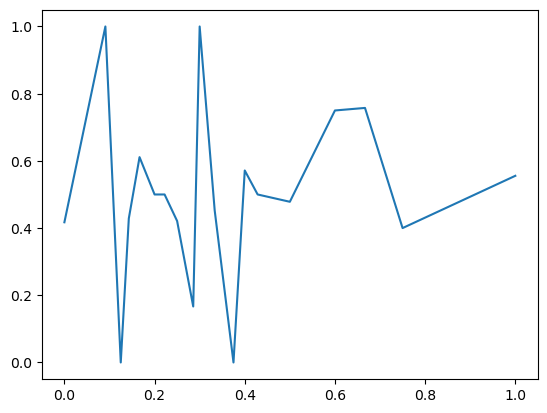

In [23]:
p_percs = data_new['perc_women_producers'].unique()
p_percs.sort()

pass_p_percs = []

for p in p_percs:
    rows = data_new.loc[data_new['perc_women_producers'] == p]
    passed = rows.loc[data_new['binary_PASS'] == 1]
    pass_p_percs.append(passed.shape[0] / rows.shape[0])
    
plt.plot(p_percs, pass_p_percs)

### Percentage of Women Directors Analysis

In [24]:
# Percentage of moves with no women directors
no_women = data_new.loc[data_new['perc_women_directors'] == 0]
no_women.shape[0] / data_new.shape[0]

0.923342939481268

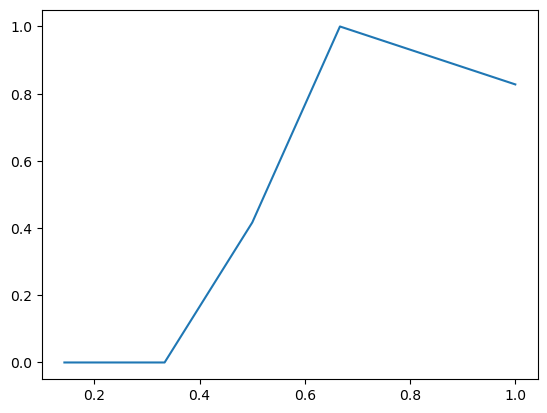

In [25]:
d_percs = data_new['perc_women_directors'].unique()
d_percs = d_percs[1:]
d_percs.sort()

pass_d_percs = []

for p in d_percs:
    rows = data_new.loc[data_new['perc_women_directors'] == p]
    passed = rows.loc[data_new['binary_PASS'] == 1]
    pass_d_percs.append(passed.shape[0] / rows.shape[0])
    
plt.plot(d_percs, pass_d_percs)

### Obersvations on Crew Gender

- Having women in director roles is much more indicative of a passed test than in producer roles
- It is important to note that most of the movies have no women in these roles

### Principal Component Analysis

In [26]:
# mlb = MultiLabelBinarizer()
# prod_data = pd.DataFrame(mlb.fit_transform(data_new["prod_comps"]),
#                           columns=mlb.classes_,
#                           index=data_new.index)
# prod_data
pca_data = data_new[["year", "binary_PASS","budget_2013$","domgross_2013$"]]
pca_data

,year,binary_PASS,budget_2013$,domgross_2013$
0,2013,0,13000000,25682380.0
1,2012,1,45658735,13611086.0
2,2013,0,20000000,53107035.0
3,2013,0,61000000,75612460.0
4,2013,0,40000000,95020213.0
...,...,...,...,...
1730,1971,0,305063707,404702718.0
1731,1971,0,143862856,59412143.0
1732,1971,0,12659931,236848653.0
1733,1971,0,17263543,23018057.0


In [27]:
from numpy import linalg,mean,dot
from pandas import DataFrame
import numpy as np
numComponents = 2
cov = pca_data.cov().to_numpy()
A = pca_data.to_numpy()
[eigvals, pcs] = linalg.eig(cov)

sorted_index = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_index]
pcs = pcs[:,sorted_index]

print(eigvals)
M = (A-mean(A.T,axis=1)).T
projected = dot(pcs.T,M).T
projected = DataFrame(projected[:,:numComponents],columns=['pc1','pc2'])
projected

[1.68379886e+16 2.30245647e+15 6.97426612e+01 2.76566238e-01]


,pc1,pc2
0,-7.883912e+07,2.634050e+07
1,-8.321750e+07,-8.201341e+06
2,-5.054202e+07,2.571936e+07
3,-1.935315e+07,-9.133884e+06
4,-5.193326e+06,1.570883e+07
...,...,...
1730,3.563798e+08,-1.725116e+08
1731,-1.640798e+07,-9.351415e+07
1732,1.267872e+08,7.439371e+07
1733,-8.047098e+07,2.158514e+07


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

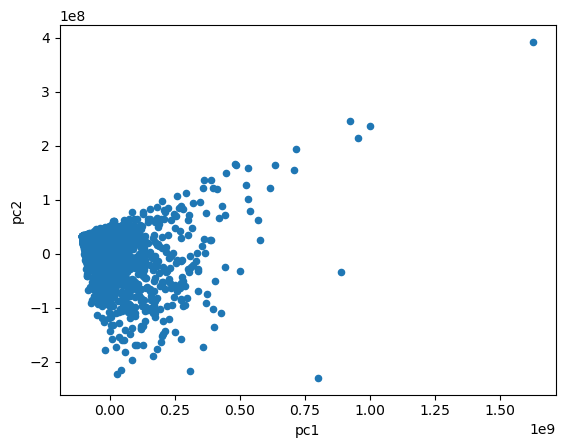

In [28]:
projected.plot(kind='scatter',x='pc1',y='pc2')

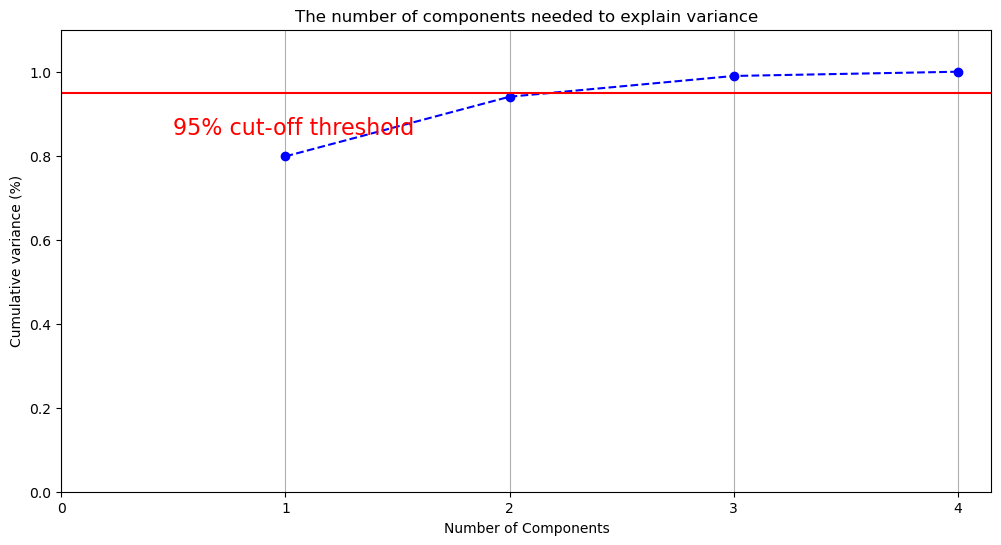

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(pca_data.to_numpy())
data_rescaled.shape


pca = PCA().fit(data_rescaled)


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 5, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 5, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [30]:
pcs[:,:numComponents]

array([[-1.83040597e-08, -4.97074003e-08],
       [-4.50461161e-10,  1.04358009e-09],
       [ 2.25992238e-01, -9.74129103e-01],
       [ 9.74129103e-01,  2.25992238e-01]])

Text(0.5, 1.0, '2nd PC')

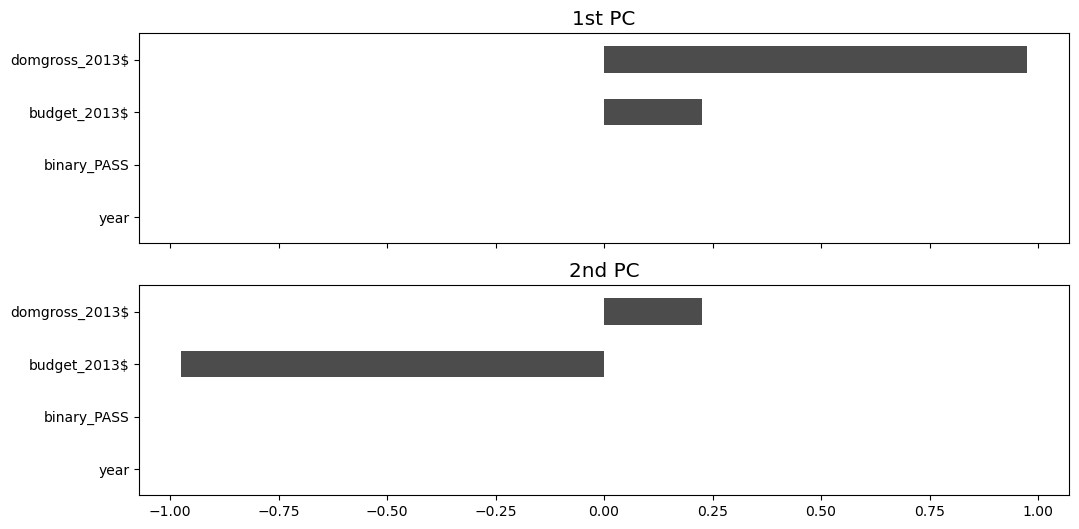

In [31]:
from pandas import Series

fig,axes = plt.subplots(2,1,sharex=True)
attrib = list(pca_data)         # get attribute names
pcdata  = Series(pcs[:,0], index=attrib)
pcdata.plot(kind='barh',ax=axes[0],color='k',alpha=0.7)
axes[0].set_title(r'1st PC', size = 'x-large')
pcdata  = Series(pcs[:,1], index=attrib)
pcdata.plot(kind='barh',ax=axes[1],color='k',alpha=0.7)
axes[1].set_title(r'2nd PC', size = 'x-large')

### Summary

- We will removed the adult column as all values are false.
- We will change the representation of our classification column (binary test pass/fail to 0 or 1)
- The rest of our dataset has highly variable features.

In [40]:
f = data_new.drop(['adult', 'binary'], axis=1)
f.to_csv("bechdel_analysis_data_cleaned.csv", encoding='utf-8', index=False)